# Linear Regression by Iteration

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Generate some random but highly correlated data, and plot it

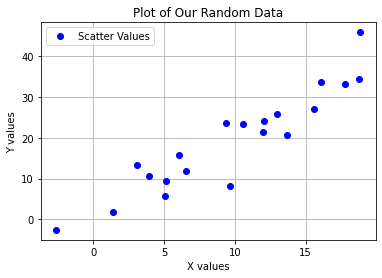

In [2]:
np.random.seed(7)

x = np.array(range(20)) + 2 * np.random.randn(20)

y = 2 * x + 5 * np.random.randn(20)


plt.plot(x,y,'bo')
plt.ylabel('Y values')
plt.xlabel('X values')
plt.legend(['Scatter Values'])
plt.title('Plot of Our Random Data')
plt.grid()
plt.show()

### Main Iteration Function

#### We are fitting a simple linear model where y = m * x + c

##### at each iteration the forecast values of y are calculated from the x array and the current values of m and c
##### m and c are then updated using the incurred cost and the learning rate (alpha)
##### c is increased by learning rate times cost, while m is increased by learning rate time cost times sthe sum of x
##### the vector maths we used in the previous workbook makes these calculations very simple to write

##### the loop will be run for the number of specified iterations, or until a cost minimum has been found



In [3]:
def regression_by_iteration(x, y, m, c, iterations):
    
    n = y.shape[0]
    alpha = 0.00001
    #gradient descend algorithm
    J_history = np.zeros([iterations, 1]);

    for iter in range(0,iterations):
        
        forecasty = m * x + c
        cost = ((forecasty - y)**2).sum()
        if (iter > 0) & (cost > J_history[iter-1]):
            break
        c = c + ((alpha/n) * cost)
        m = m + ((alpha/n) * cost * x.sum())
        J_history[iter] = cost 
        
    return m,c, J_history, iter

### Now call the regression by iteration

#### First initialise m and c to zero, then call the rouine and plot some results

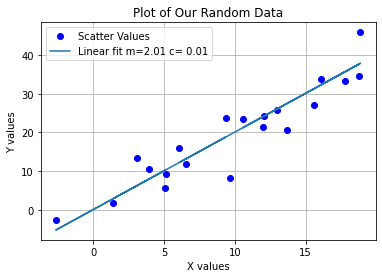

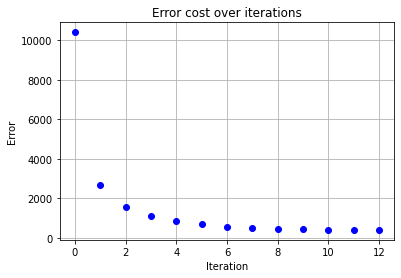

In [4]:
m = 0
c = 0

m, c, J, itersused = regression_by_iteration(x, y, m, c, 2000)

plt.plot(x,y,'bo')
plt.plot(x,m * x + c,'-')
plt.ylabel('Y values')
plt.xlabel('X values')
plt.legend(['Scatter Values', f'Linear fit m={m:.2f} c= {c:.2f}'])
plt.title('Plot of Our Random Data')
plt.grid()
plt.show()

plt.plot(range(itersused), J[:itersused],'bo')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.title('Error cost over iterations')
plt.grid()
plt.show()